In [1]:
# libraries
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
test = pd.read_csv("Data/test.csv")
train = pd.read_csv("Data/train.csv")
sample = pd.read_csv("Data/sample_submission.csv")
print(test.shape)
print(train.shape)

(1459, 80)
(1460, 81)


In [3]:

# deal with missing values, can alter this later

def na_clean(df):
    # some vars are just too missing so I remove the field
    df = df.drop(columns = ["FireplaceQu", "PoolQC", "MiscFeature"])

    # replace some numeric vars w/ median
    median_replace_vars = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']
    for var in median_replace_vars:
        df[var].fillna(df[var].median(), inplace = True)
    
    # replace some num vars w/ 0
    zero_replace_vars = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']
    for var in zero_replace_vars:
        df[var].fillna(0, inplace = True)
    
    # replace some cat vars w/ most freq value 
    df['MasVnrType'].fillna('None', inplace = True)
    df['Electrical'].fillna('SBrkr', inplace = True)
    df['MSZoning'].fillna('RL', inplace = True)
    df['SaleType'].fillna('WD', inplace = True)
    df['Utilities'].fillna('AllPub', inplace = True)
    df['KitchenQual'].fillna('TA', inplace = True)
    df['Functional'].fillna('Typ', inplace = True)

    # other cat vars just put missing if there isn't a glaring most popular category
    replace_missing_vars = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
        'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'Exterior1st', 
        'Exterior2nd']
    for var in replace_missing_vars:
        df[var].fillna("Missing", inplace = True)

    return df

train = na_clean(train)
test = na_clean(test)

## 1st Attempt

In [4]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

<AxesSubplot:>

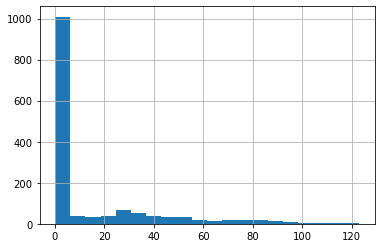

In [6]:
# Most houses are not remodelled, plan to use year remodelled as feature and whether or not remodelled as feature.
(train.YearRemodAdd-train.YearBuilt).hist(bins= 20)

In [7]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [8]:
train['2ndFlrSF'].value_counts()

0       829
728      10
504       9
672       8
546       8
       ... 
788       1
1116      1
1112      1
1111      1
1872      1
Name: 2ndFlrSF, Length: 417, dtype: int64

<AxesSubplot:>

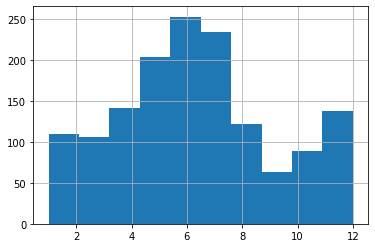

In [9]:
train.MoSold.hist()

In [10]:
train2 = train[['Id', 'LotArea', 'Street', 'Neighborhood', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 
              'BsmtCond', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
             'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'YrSold', 'MoSold']]

In [11]:
test2 = test[['Id', 'LotArea', 'Street', 'Neighborhood', 'OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd', 
              'BsmtCond', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
             'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'YrSold', 'MoSold']]

In [12]:
train2.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtCond,1stFlrSF,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold
0,1,8450,Pave,CollgCr,7,5,2003,2003,TA,856,...,1,0,2,1,3,1,Gd,8,2008,2
1,2,9600,Pave,Veenker,6,8,1976,1976,TA,1262,...,0,1,2,0,3,1,TA,6,2007,5
2,3,11250,Pave,CollgCr,7,5,2001,2002,TA,920,...,1,0,2,1,3,1,Gd,6,2008,9
3,4,9550,Pave,Crawfor,7,5,1915,1970,Gd,961,...,1,0,1,0,3,1,Gd,7,2006,2
4,5,14260,Pave,NoRidge,8,5,2000,2000,TA,1145,...,1,0,2,1,4,1,Gd,9,2008,12


In [13]:
# Adding remodelled indicator
train3 = train2.copy()
train3['Remodeled'] = (train3.YearRemodAdd-train3.YearBuilt) == 0
train3.drop(columns = ['YearBuilt'], inplace = True)

In [14]:
# Adding remodelled indicator
test3 = test2.copy()
test3['Remodeled'] = (test3.YearRemodAdd-test3.YearBuilt) == 0
test3.drop(columns = ['YearBuilt'], inplace = True)

In [15]:
train3.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearRemodAdd,BsmtCond,1stFlrSF,2ndFlrSF,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold,Remodeled
0,1,8450,Pave,CollgCr,7,5,2003,TA,856,854,...,0,2,1,3,1,Gd,8,2008,2,True
1,2,9600,Pave,Veenker,6,8,1976,TA,1262,0,...,1,2,0,3,1,TA,6,2007,5,True
2,3,11250,Pave,CollgCr,7,5,2002,TA,920,866,...,0,2,1,3,1,Gd,6,2008,9,False
3,4,9550,Pave,Crawfor,7,5,1970,Gd,961,756,...,0,1,0,3,1,Gd,7,2006,2,False
4,5,14260,Pave,NoRidge,8,5,2000,TA,1145,1053,...,0,2,1,4,1,Gd,9,2008,12,True


In [16]:
# Add 1st and 2nd floor area
train4 = train3.copy()
train4['Total_Inside_Area'] = train4['1stFlrSF'] + train4['2ndFlrSF']
train4.drop(columns = ['1stFlrSF', '2ndFlrSF', 'GrLivArea'], inplace = True)
train4.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearRemodAdd,BsmtCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area
0,1,8450,Pave,CollgCr,7,5,2003,TA,1,0,2,1,3,1,Gd,8,2008,2,True,1710
1,2,9600,Pave,Veenker,6,8,1976,TA,0,1,2,0,3,1,TA,6,2007,5,True,1262
2,3,11250,Pave,CollgCr,7,5,2002,TA,1,0,2,1,3,1,Gd,6,2008,9,False,1786
3,4,9550,Pave,Crawfor,7,5,1970,Gd,1,0,1,0,3,1,Gd,7,2006,2,False,1717
4,5,14260,Pave,NoRidge,8,5,2000,TA,1,0,2,1,4,1,Gd,9,2008,12,True,2198


In [17]:
# Add 1st and 2nd floor area
test4 = test3.copy()
test4['Total_Inside_Area'] = test4['1stFlrSF'] + test4['2ndFlrSF']
test4.drop(columns = ['1stFlrSF', '2ndFlrSF', 'GrLivArea'], inplace = True)
test4.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearRemodAdd,BsmtCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area
0,1461,11622,Pave,NAmes,5,6,1961,TA,0.0,0.0,1,0,2,1,TA,5,2010,6,True,896
1,1462,14267,Pave,NAmes,6,6,1958,TA,0.0,0.0,1,1,3,1,Gd,6,2010,6,True,1329
2,1463,13830,Pave,Gilbert,5,5,1998,TA,0.0,0.0,2,1,3,1,TA,6,2010,3,False,1629
3,1464,9978,Pave,Gilbert,6,6,1998,TA,0.0,0.0,2,1,3,1,Gd,7,2010,6,True,1604
4,1465,5005,Pave,StoneBr,8,5,1992,TA,0.0,0.0,2,0,2,1,Gd,5,2010,1,True,1280


In [18]:
# Add bathrooms
train5 = train4.copy()
train5['Bathrooms'] = train5.BsmtFullBath + 0.5*train5.BsmtHalfBath + train5.FullBath + 0.5*train5.HalfBath
train5.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace = True)
train5.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearRemodAdd,BsmtCond,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area,Bathrooms
0,1,8450,Pave,CollgCr,7,5,2003,TA,3,1,Gd,8,2008,2,True,1710,3.5
1,2,9600,Pave,Veenker,6,8,1976,TA,3,1,TA,6,2007,5,True,1262,2.5
2,3,11250,Pave,CollgCr,7,5,2002,TA,3,1,Gd,6,2008,9,False,1786,3.5
3,4,9550,Pave,Crawfor,7,5,1970,Gd,3,1,Gd,7,2006,2,False,1717,2.0
4,5,14260,Pave,NoRidge,8,5,2000,TA,4,1,Gd,9,2008,12,True,2198,3.5


In [19]:
test5 = test4.copy()
test5['Bathrooms'] = test5.BsmtFullBath + 0.5*test5.BsmtHalfBath + test5.FullBath + 0.5*test5.HalfBath
test5.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace = True)
test5.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearRemodAdd,BsmtCond,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area,Bathrooms
0,1461,11622,Pave,NAmes,5,6,1961,TA,2,1,TA,5,2010,6,True,896,1.0
1,1462,14267,Pave,NAmes,6,6,1958,TA,3,1,Gd,6,2010,6,True,1329,1.5
2,1463,13830,Pave,Gilbert,5,5,1998,TA,3,1,TA,6,2010,3,False,1629,2.5
3,1464,9978,Pave,Gilbert,6,6,1998,TA,3,1,Gd,7,2010,6,True,1604,2.5
4,1465,5005,Pave,StoneBr,8,5,1992,TA,2,1,Gd,5,2010,1,True,1280,2.0


In [20]:
train6 = train5.copy()
train6 = pd.get_dummies(train6, columns = ['Street', 'Neighborhood', 'OverallQual', 'OverallCond', 'BsmtCond',
                                           'KitchenQual'], drop_first=True)
train6.head()

,Id,LotArea,YearRemodAdd,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area,...,OverallCond_7,OverallCond_8,OverallCond_9,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,1,8450,2003,3,1,8,2008,2,True,1710,...,0,0,0,0,0,0,1,0,1,0
1,2,9600,1976,3,1,6,2007,5,True,1262,...,0,1,0,0,0,0,1,0,0,1
2,3,11250,2002,3,1,6,2008,9,False,1786,...,0,0,0,0,0,0,1,0,1,0
3,4,9550,1970,3,1,7,2006,2,False,1717,...,0,0,0,1,0,0,0,0,1,0
4,5,14260,2000,4,1,9,2008,12,True,2198,...,0,0,0,0,0,0,1,0,1,0


In [21]:
test6 = test5.copy()
test6 = pd.get_dummies(test6, columns = ['Street', 'Neighborhood', 'OverallQual', 'OverallCond', 'BsmtCond',
                                           'KitchenQual'], drop_first=True)
test6.head()

,Id,LotArea,YearRemodAdd,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area,...,OverallCond_7,OverallCond_8,OverallCond_9,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,1461,11622,1961,2,1,5,2010,6,True,896,...,0,0,0,0,0,0,1,0,0,1
1,1462,14267,1958,3,1,6,2010,6,True,1329,...,0,0,0,0,0,0,1,0,1,0
2,1463,13830,1998,3,1,6,2010,3,False,1629,...,0,0,0,0,0,0,1,0,0,1
3,1464,9978,1998,3,1,7,2010,6,True,1604,...,0,0,0,0,0,0,1,0,1,0
4,1465,5005,1992,2,1,5,2010,1,True,1280,...,0,0,0,0,0,0,1,0,1,0


### Model features

In [22]:
X_train = train6.copy()
X_train = X_train.drop(columns = ['Id'])
X_train.head()
X_train.columns

Index(['LotArea', 'YearRemodAdd', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'YrSold', 'MoSold', 'Remodeled', 'Total_Inside_Area',
       'Bathrooms', 'Street_Pave', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'Overal

In [23]:
X_test = test6.copy()
X_test = X_test.drop(columns = ['Id'])
X_test.head()
X_test.shape


(1459, 59)

In [25]:
Y_train = train.SalePrice
Y_train.shape


(1460,)

In [26]:
Y_test = sample.SalePrice
Y_test.shape

(1459,)

### Model with Lot area, year remodelled, number of bedrooms, kitchen, year and month sold, remodeled indicator, total inside area, total number of bathrooms, dummies for neighborhood, overall condition, overall quality, basement and kitchen quality

In [27]:
# Decent R2
from sklearn.linear_model import LinearRegression
lr_1 = LinearRegression(fit_intercept=True)
lr_1.fit(X_train,Y_train)
lr_1.score(X_train,Y_train)

0.8499854578949784

In [28]:
lr_1.score(X_test ,Y_test)

-17.592672566441507

In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz


dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, Y_train)
print('Accuracy:', dt.score(X_test, Y_test))

Accuracy: -18.977368429655467


## 2nd Attempt


In [30]:
# Starting with train5 from attempt 1
test5.head()

,Id,LotArea,Street,Neighborhood,OverallQual,OverallCond,YearRemodAdd,BsmtCond,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,YrSold,MoSold,Remodeled,Total_Inside_Area,Bathrooms
0,1461,11622,Pave,NAmes,5,6,1961,TA,2,1,TA,5,2010,6,True,896,1.0
1,1462,14267,Pave,NAmes,6,6,1958,TA,3,1,Gd,6,2010,6,True,1329,1.5
2,1463,13830,Pave,Gilbert,5,5,1998,TA,3,1,TA,6,2010,3,False,1629,2.5
3,1464,9978,Pave,Gilbert,6,6,1998,TA,3,1,Gd,7,2010,6,True,1604,2.5
4,1465,5005,Pave,StoneBr,8,5,1992,TA,2,1,Gd,5,2010,1,True,1280,2.0


<AxesSubplot:>

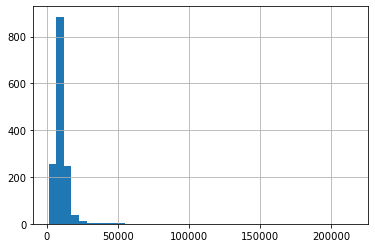

In [34]:
train5.LotArea.hist(bins = 40)

In [ ]:
train5.LotArea